# Ensemble Learning

## Initial Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


## Split the Data into Training and Testing

In [21]:
# Create our features
X = df[["loan_amnt", "int_rate", "installment", "home_ownership", "annual_inc", "verification_status", "pymnt_plan"]]
# Create our target
y = df["loan_status"]

In [33]:
X = pd.get_dummies(X)

In [34]:
# Check the balance of our target values
y.value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [35]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [36]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only trai|n on the training dataset
X_scaler = scaler.fit(X_train)

In [38]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [39]:
# Resample the training data with the BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)
predictions = rf_model.predict(X_test_scaled)

In [40]:
# Calculated the balanced accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [41]:
# Display the confusion matrix

print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,87
Actual 1,7,17111


Accuracy Score : 0.9945364719558268
Classification Report
              precision    recall  f1-score   support

   high_risk       0.00      0.00      0.00        87
    low_risk       0.99      1.00      1.00     17118

    accuracy                           0.99     17205
   macro avg       0.50      0.50      0.50     17205
weighted avg       0.99      0.99      0.99     17205



In [42]:
# Print the imbalanced classification report
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,87
Actual 1,7,17111


Accuracy Score : 0.9945364719558268
Classification Report
              precision    recall  f1-score   support

   high_risk       0.00      0.00      0.00        87
    low_risk       0.99      1.00      1.00     17118

    accuracy                           0.99     17205
   macro avg       0.50      0.50      0.50     17205
weighted avg       0.99      0.99      0.99     17205



<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

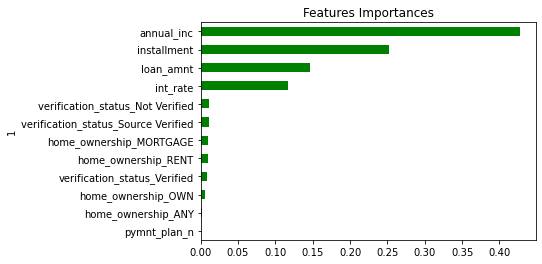

In [43]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='green', title= 'Features Importances', legend=False)

### Easy Ensemble Classifier

In [44]:
# Train the Classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
from imblearn.ensemble import EasyEnsembleClassifier 
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train) 
EasyEnsembleClassifier(...)
y_pred = eec.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[   45    42]
 [ 6870 10248]]


In [45]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, predictions)

In [46]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

In [47]:
# Print the imbalanced classification report
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,87
Actual 1,7,17111


Accuracy Score : 0.598256320836966
Classification Report
              precision    recall  f1-score   support

   high_risk       0.01      0.52      0.01        87
    low_risk       1.00      0.60      0.75     17118

    accuracy                           0.60     17205
   macro avg       0.50      0.56      0.38     17205
weighted avg       0.99      0.60      0.74     17205



### Final Questions

1. Which model had the best balanced accuracy score?

    Easy Ensemble Classifier

2. Which model had the best recall score?

   Easy Ensemble Classifier 

3. Which model had the best geometric mean score?

    Easy Ensemble Classifier, 81

4. What are the top three features?

    (0.07254782774055739, 'total_rec_prncp'), (0.07158204928200176, 'total_pymnt'), (0.06326525363080364, 'total_rec_int')